# Ejercicio2

### Paso 1: Librerías y requerimientos

In [28]:
install.packages("xtable")
install.packages("hdm")
install.packages("glmnet")
install.packages("ggplot2")
install.packages("tidyr")
install.packages("MLmetrics")

Warning message:
"package 'xtable' is in use and will not be installed"
Warning message:
"package 'hdm' is in use and will not be installed"
Warning message:
"package 'glmnet' is in use and will not be installed"
Warning message:
"package 'ggplot2' is in use and will not be installed"
Warning message:
"package 'tidyr' is in use and will not be installed"
also installing the dependencies 'gtools', 'gplots', 'ROCR'




package 'gtools' successfully unpacked and MD5 sums checked
package 'gplots' successfully unpacked and MD5 sums checked
package 'ROCR' successfully unpacked and MD5 sums checked
package 'MLmetrics' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\PC\AppData\Local\Temp\RtmpyMnzV6\downloaded_packages


In [13]:
library(hdm)
library(xtable)
library(glmnet)
library(ggplot2)
set.seed(12092024)
library(readxl)
library(tidyr)
library(dplyr)





### Paso 2: Leer la data y quedarnos con aquiellos sin missnig values

In [5]:
df <- read_excel("../input/Districtwise_literacy_rates.xlsx", sheet = 1)
df <- na.omit(df)
head(df, 5)
dim(df)

STATCD,DISTCD,STATNAME,DISTNAME,DISTRICTS,BLOCKS,VILLAGES,TOTPOPULAT,P_URB_POP,POPULATION_0_6,⋯,CLS5,CLS6,CLS7,TCH1,TCH2,TCH3,TCH4,TCH5,TCH6,TCH7
<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,101,JAMMU & KASHMIR,KUPWARA,1,13,391,875564,11.33,197001.90,⋯,23,852,239,2708,5205,43,70,28,1065,638
1,102,JAMMU & KASHMIR,BARAMULA,1,18,678,1015503,17.19,161871.18,⋯,30,1665,360,2937,5873,236,60,105,2533,964
1,103,JAMMU & KASHMIR,SRINAGAR,1,8,94,1269751,98.73,155798.45,⋯,0,2873,40,828,3647,1159,14,0,4757,129
1,104,JAMMU & KASHMIR,BADGAM,1,13,523,735753,11.74,150755.79,⋯,8,1035,325,1878,3892,250,68,19,1493,716
1,105,JAMMU & KASHMIR,PULWAMA,1,8,359,570060,13.80,97651.28,⋯,5,1101,209,1336,2682,113,90,38,1414,506


[1] 625 100

### Paso 3: Histograma del literaacity hombres y Literacity mujeres

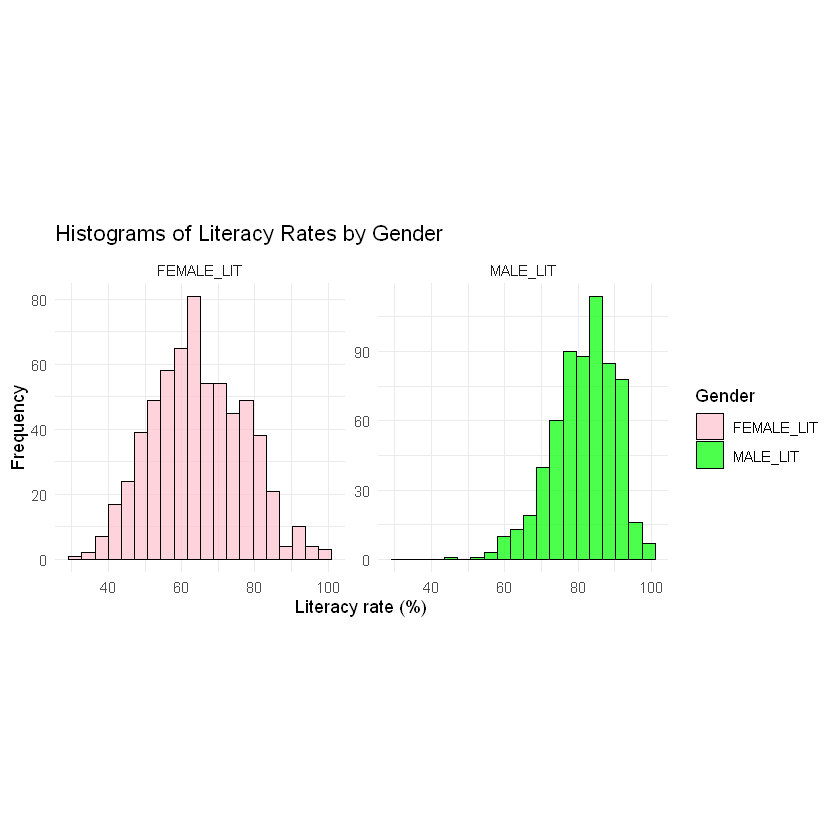

In [ ]:
df_long <- df %>%
  select(FEMALE_LIT, MALE_LIT) %>%
  pivot_longer(cols = everything(),
               names_to = "Gender",
               values_to = "Literacy")

# Dos histogramas uno al costado del otro
ggplot(df_long, aes(x = Literacy, fill = Gender)) +
  geom_histogram(bins = 20, alpha = 0.7, color = "black") +
  facet_wrap(~Gender, ncol = 2, scales = "free_y") +
  labs(title = "Histograms of Literacy Rates by Gender",
       x = "Literacy rate (%)",
       y = "Frequency") +
  scale_fill_manual(values = c("FEMALE_LIT" = "pink", "MALE_LIT" = "green")) +
  theme_minimal() +
  theme(aspect.ratio = 3/3)   

##### En este caso se ve claramente que la tasa de alfabetización en promedio tiene una distribución con una media centrada alrededor de 80 en los hombres y de 60 en las mujeres, siendo además en el caso femenino una distribución con cola a la izquierda y con la mayor cantidad de observaciones hacia valores más bajos. Esto contrasta con la distribución masculina, más concentrada y en niveles más elevados. Todo ello refleja la brecha de género que sigue existiendo en ese país respecto a la tasa de alfabetización, la cual probablemente se manifieste también en muchas otras áreas.

### Paso 4: Estimación de una especificación de baja dimensión y cálculo del 𝑅2 en el set de prueba

#### En este caso el codigo será algo diferente al de python porque no se puede aplicar folds directamente para calcular el R2 promedio

In [37]:
Z = df %>%
  select(, -STATCD, -DISTCD, -STATNAME, -DISTNAME, -DISTRICTS,-BLOCKS, -VILLAGES, -OVERALL_LI, -AREA_SQKM)


In [32]:
set.seed(1234)
training <- sample(nrow(Z), nrow(Z) * (3 / 4), replace = FALSE)

data_train <- Z[training, ]
data_test <- Z[-training, ]

In [33]:
y_train <- data_train$FEMALE_LIT
y_test <- data_test$FEMALE_LIT

In [ ]:
x_basic <- "TOTPOPULAT + P_URB_POP + POPULATION_0_6 + GROWTHRATE + SEXRATIO + P_SC_POP + P_ST_POP + MALE_LIT + TOT_6_10_15 + TOT_11_13_15 + SCH1 + SCH2 + SCH3 + SCH4 + SCH5 + SCH6 + SCH7 + SCH9 + SCHTOT + SCH1G + SCH2G + SCH3G + SCH4G + SCH5G + SCH6G + SCH7G + SCH9G + SCHTOTG + SCH1P + SCH2P + SCH3P + SCH4P + SCH5P + SCH6P + SCH7P + SCH9P + SCHTOTP + SCH1GR + SCH2GR + SCH3GR + SCH4GR + SCH5GR + SCH6GR + SCH7GR + SCH9GR + SCHTOTGR + SCH1PR + SCH2PR + SCH3PR + SCH4PR + SCH5PR + SCH6PR + SCH7PR + SCH9PR + SELE1 + SELE2 + SELE3 + SELE4 + SELE5 + SELE6 + SELE7 + SCOMP1 + SCOMP2 + SCOMP3 + SCOMP4 + SCOMP5 + SCOMP6 + SCOMP7 + ENR501 + ENR502 + ENR503 + ENR504 + ENR505 + ENR506 + ENR507 + ENR509 + CLS1 + CLS2 + CLS3 + CLS4 + CLS5 + CLS6 + CLS7 + TCH1 + TCH2 + TCH3 + TCH4 + TCH5 + TCH6 + TCH7"
formula_basic <- as.formula(paste("FEMALE_LIT", "~", x_basic))
model_x_basic_train <- model.matrix(formula_basic, data_train)
#model_x_basic_train <- scale(model_x_basic_train)
model_x_basic_test <- model.matrix(formula_basic, data_test)
#model_x_basic_test <- scale(model_x_basic_test)
# Intente escalar pero por un motivo desconocido genera NAs y  glmnet no deja trabajar con eso
p_basic <- dim(model_x_basic_train)[2]
p_basic

[1] 91

In [53]:
fit_lasso_cv_basic <- cv.glmnet(model_x_basic_train, y_train, family = "gaussian", alpha = 1)
yhat_lasso_cv_basic <- predict(fit_lasso_cv_basic, newx = model_x_basic_test)
mse_lasso_cv_basic <- summary(lm((y_test - yhat_lasso_cv_basic)^2 ~ 1))$coef[1:2]
r2_lasso_cv_basic <- 1 - mse_lasso_cv_basic[1] / var(y_test)
cat("Flexible model R^2 (Lasso): ", r2_lasso_cv_basic)

Flexible model R^2 (Lasso):  0.8432141

### Paso 5: Estime una especificación de alta dimensión (flexible): términos de interacción y términos al cuadrado y calcule el R2 


In [41]:
base_vars <- c("TOTPOPULAT", "P_URB_POP", "POPULATION_0_6", "GROWTHRATE", "SEXRATIO", "P_SC_POP", "P_ST_POP", "MALE_LIT", "TOT_6_10_15", "TOT_11_13_15", "SCH1", "SCH2", "SCH3", "SCH4", "SCH5", "SCH6", "SCH7", "SCH9", "SCHTOT", "SCH1G", "SCH2G", "SCH3G", "SCH4G", "SCH5G", "SCH6G", "SCH7G", "SCH9G",  "SCHTOTG", "SCH1P", "SCH2P", "SCH3P", "SCH4P", "SCH5P", "SCH6P", "SCH7P","SCH9P", "SCHTOTP", "SCH1GR", "SCH2GR", "SCH3GR", "SCH4GR", "SCH5GR", "SCH6GR", "SCH7GR", "SCH9GR", "SCHTOTGR", "SCH1PR", "SCH2PR", "SCH3PR", "SCH4PR", "SCH5PR", "SCH6PR", "SCH7PR", "SCH9PR", "SELE1", "SELE2", "SELE3","SELE4", "SELE5", "SELE6", "SELE7", "SCOMP1", "SCOMP2", "SCOMP3", "SCOMP4", "SCOMP5", "SCOMP6", "SCOMP7", "ENR501", "ENR502", "ENR503", "ENR504", "ENR505","ENR506", "ENR507", "ENR509", "CLS1", "CLS2", "CLS3", "CLS4", "CLS5", "CLS6","CLS7", "TCH1", "TCH2", "TCH3", "TCH4", "TCH5", "TCH6", "TCH7")

# Crear la fórmula de solo potencias
x_flex <- paste(
  paste(base_vars, collapse = " + "), 
  paste("I(", base_vars, "^2)", collapse = " + "), 
  paste("I(", base_vars, "^3)", collapse = " + "), 
  sep = " + "
)

formula_flex <- as.formula(paste("FEMALE_LIT ~", x_flex))
model_x_flex_train <- model.matrix(formula_flex, data = data_train)
model_x_flex_test <- model.matrix(formula_flex, data = data_test)
p_flex <- dim(model_x_flex_train)[2]


In [54]:
fit_lasso_cv_flex <- cv.glmnet(model_x_flex_train, y_train, family = "gaussian", alpha = 1)
yhat_lasso_cv_flex <- predict(fit_lasso_cv_flex, newx = model_x_flex_test)
mse_lasso_cv_flex <- summary(lm((y_test - yhat_lasso_cv_flex)^2 ~ 1))$coef[1:2]
r2_lasso_cv_flex <- 1 - mse_lasso_cv_flex[1] / var(y_test)
cat("Flexible model R^2 (Lasso): ", r2_lasso_cv_flex)

Flexible model R^2 (Lasso):  0.863478

#### Podemos observar que el modelo lazo con potencias es mejor que el básico

### Paso 6: λ que va desde 10.000 hasta 0,001

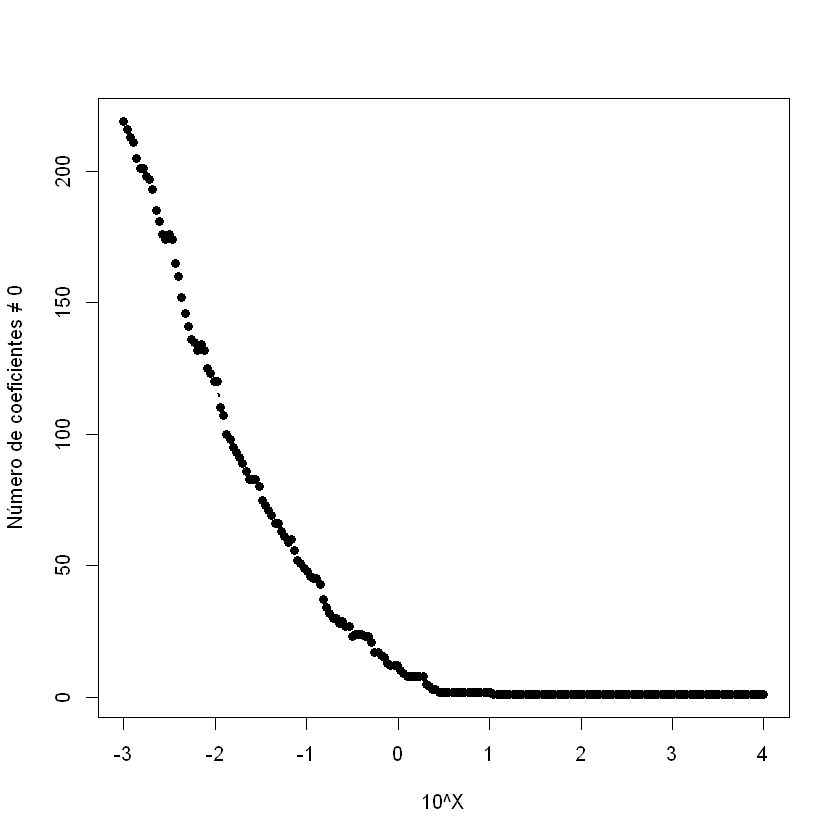

In [56]:
lambdas <- 10^seq(4, -3, length.out = 200)
fit_lasso <- glmnet(model_x_flex_train, y_train, alpha = 1, lambda = lambdas)
coefs <- coef(fit_lasso)
nonzero_counts <- apply(coefs != 0, 2, sum)

# Gráfico
plot(log10(lambdas), nonzero_counts, type = "b", 
     xlab = "10^X", ylab = "Número de coeficientes ≠ 0", 
     main = "Ruta LASSO (λ=10,000 → 0.001)", 
     pch = 16, lwd = 2)